In [7]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

file_to_open = "C:/Users/igles/Documents/Data Science/1. advStats/Lesson 4 - ANOVAs/YoutubeChannels_Python.csv"
YouTube = pd.read_csv(file_to_open)

In [22]:
YouTube1 = YouTube[['Gr2de', 'Video views']]
YouTube1.head()

Gr2de  Video views
0      0  20869786591
1      0  47548839843
2      0   9793305082
3      0  22675948293
4      0  26273668433

In [9]:
YouTube1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
Gr2de          5000 non-null int64
Video views    5000 non-null int64
dtypes: int64(2)
memory usage: 78.2 KB


In [24]:
def recode (series): 
    if series == 0: 
        return "A plus plus"
    if series == 1: 
        return "A plus"
    if series == 2: 
        return "A"
    if series == 3:
        return "B plus"

YouTube1['GradeR'] = YouTube1['Gr2de'].apply(recode)
YouTube1.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


Gr2de  Video views       GradeR
0      0  20869786591  A plus plus
1      0  47548839843  A plus plus
2      0   9793305082  A plus plus
3      0  22675948293  A plus plus
4      0  26273668433  A plus plus

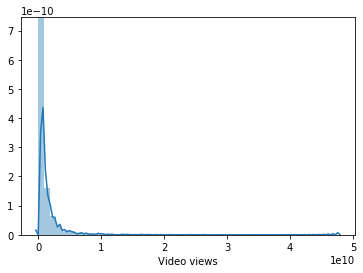

In [11]:
sns.distplot(YouTube1['Video views'])

In [13]:
YouTube1['VideoViewsSQRT'] = np.sqrt(YouTube1['Video views'])
sns.distplot(YouTube1['VideoViewsSQRT'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


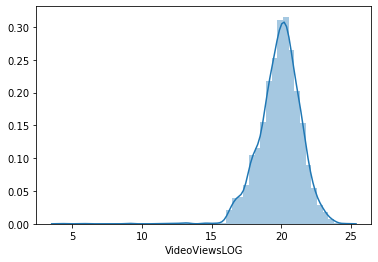

In [16]:
YouTube1['VideoViewsLOG'] = np.log(YouTube1['Video views'])
sns.distplot(YouTube1['VideoViewsLOG'])

In [17]:
scipy.stats.bartlett(YouTube1['VideoViewsLOG'], YouTube1['Gr2de'])

BartlettResult(statistic=4642.606911455061, pvalue=0.0)

In [19]:
stats.f_oneway(YouTube1['VideoViewsLOG'][YouTube1['GradeR']=='A plus plus'],
                   YouTube1['VideoViewsLOG'][YouTube1['GradeR']=='A plus'],
               YouTube1['VideoViewsLOG'][YouTube1['GradeR']=='A'],
               YouTube1['VideoViewsLOG'][YouTube1['GradeR']=='B plus'])

F_onewayResult(statistic=283.85148674568444, pvalue=3.895240835935201e-170)

In [20]:
postHoc = MultiComparison(YouTube1['VideoViewsLOG'], YouTube1['Gr2de'])
postHocResults = postHoc.tukeyhsd()
print(postHocResults)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -1.5233 0.0085   -2.76 -0.2865   True
     0      2   -3.103  0.001 -4.2146 -1.9913   True
     0      3  -4.1291  0.001 -5.2399 -3.0184   True
     1      2  -1.5797  0.001  -2.133 -1.0264   True
     1      3  -2.6059  0.001 -3.1573 -2.0544   True
     2      3  -1.0262  0.001 -1.1278 -0.9245   True
----------------------------------------------------


In [21]:
YouTube1.groupby('GradeR').mean()

Gr2de   Video views  VideoViewsSQRT  VideoViewsLOG
GradeR                                                         
A              2.0  1.676207e+09    34678.089608      20.475580
A plus         1.0  6.053121e+09    70951.341638      22.055279
A plus plus    0.0  2.119909e+10   139631.341341      23.578544
B plus         3.0  5.265217e+08    19943.101566      19.449400